<a href="https://colab.research.google.com/github/sumitashish033/Periodic-Artifact-removal-in-ECG-Signal/blob/main/1804008_EC6523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NAME:-SUMIT ASHISH** 
#**ROLL NO:-1804008**
#**BRANCH:-ECE-1(6TH SEM)** 
#**SUBJECT:-BIOMEDICAL SIGNAL PROCESSING(EC6523)**


# **Question:-**
# *Design a frequency-domain filter to remove periodic artifacts, such as power-line interference.*



##**Solution:-**

####**An electrocardiogram (ECG)** is a medical test that detects cardiac (heart) abnormalities by measuring the electrical activity generated by the heart as it contracts. The machine that records the patient’s ECG is called an electrocardiograph.

####**->**The electrocardiograph records the electrical activity of the heart muscle and displays this data as a trace on a screen or on paper. This data is then interpreted by a medical practitioner.

####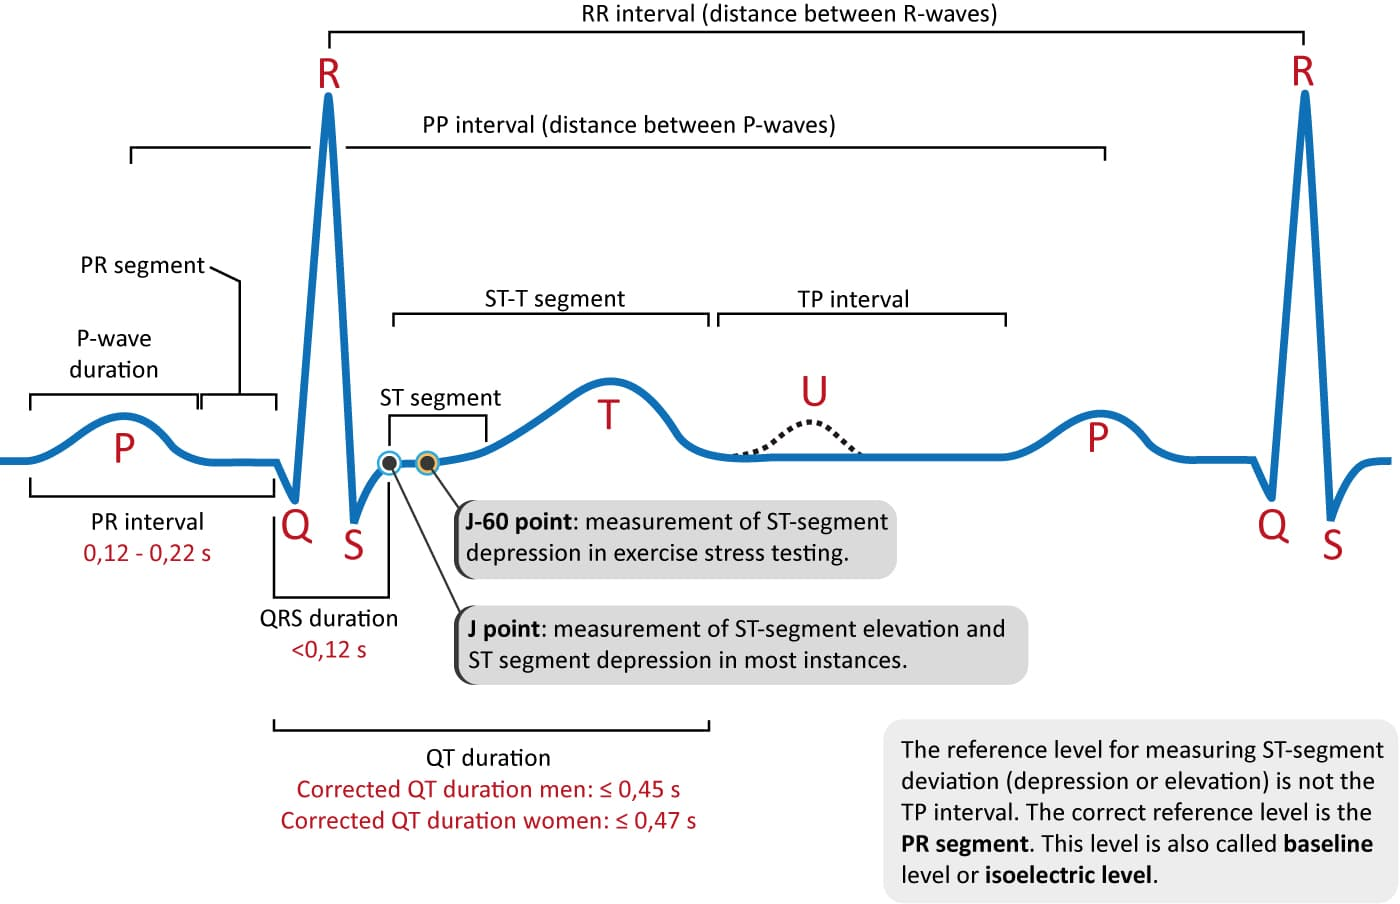**->**ECGs from healthy hearts have a characteristic shape. Any irregularity in the heart rhythm or damage to the heart muscle can change the electrical activity of the heart so that the shape of the ECG is changed.





## **Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.fftpack import fft
import scipy.io.wavfile
import scipy.signal

## **Reading the required data file**
ECG extraction from data files

wav to dataframe conversion
[-8436 -8697 -9326 ... -8016 -8203 -8674]
time representation
[0.000e+00 1.000e-03 2.000e-03 ... 2.569e+00 2.570e+00 2.571e+00]
sample Rate
1000


<Figure size 432x288 with 0 Axes>

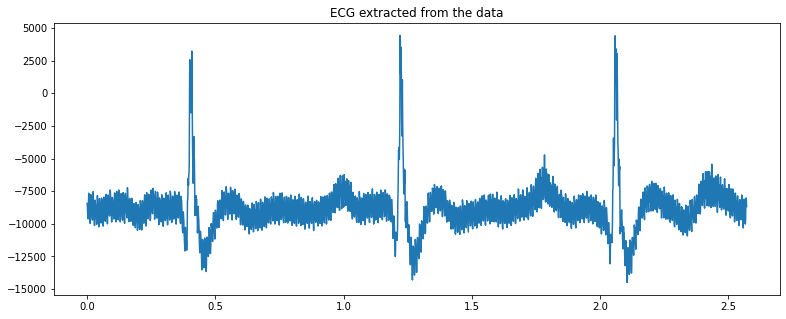

In [ ]:
sampleRate, data = scipy.io.wavfile.read('ecg.wav')
times = np.arange(len(data))/sampleRate
print('wav to dataframe conversion')
print (data)
plt.figure()
plt.figure(figsize=(13, 5))
plt.plot(times,data)
plt.title('ECG extracted from the data')
print('time representation')
print (times)
print('sample Rate')
print(sampleRate)


# **Artifacts**
Any signal other than that of interest could be termed 
as an interference, artifact, or simply noise. 




Noise is omnipresent! The problems caused by 
artifacts in biomedical signals are vast in scope and 
variety their potential for degrading the performance 
of the most sophisticated signal processing algorithms 
is high.




The sources of noise could be physiological, the 
instrumentation used, or the environment of the 
experiment.

### **Generation of Periodic Artifact**

Text(0.5, 1.0, 'periodic artifact')

<Figure size 432x288 with 0 Axes>

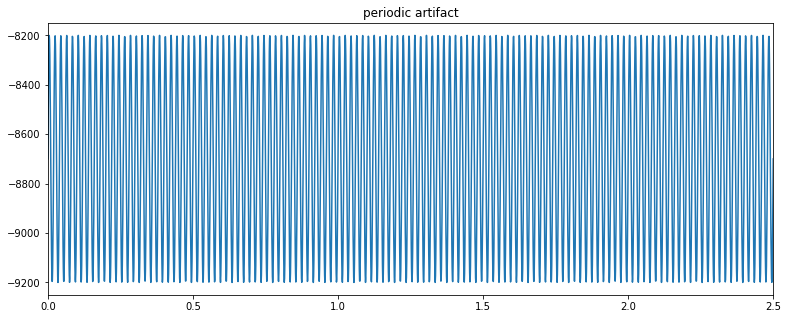

In [ ]:
t = np.linspace(0, 2.5, 2572)
sine = 500*np.sin(2 * np.pi * 50 * t)-8700
plt.figure()
plt.figure(figsize=(13, 5))
plt.plot(t,sine)
plt.margins(0, .05)
plt.title('periodic artifact')

## **Artifacts examples:-**
###Powerline Interference:-

*Electromagnetic fields caused by a powerline represent a common noise source in the ECG, as well as to any
other bioelectrical signal recorded from the body surface.
Such noise is characterized by 50 or 60 Hz sinusoidal interference, possibly accompanied by a number of
harmonics. Such narrowband noise renders the analysis and interpretation of the ECG more difficult, since the
delineation of low-amplitude waveforms becomes unreliable and spurious waveforms may be introduced.
It is necessary to remove powerline interference from ECG signals as it completely superimposes the low
frequency ECG waves like P wave and T wave.*


Text(0.5, 1.0, 'ECG SIGNAL WITH PERIODIC NOISE')

<Figure size 432x288 with 0 Axes>

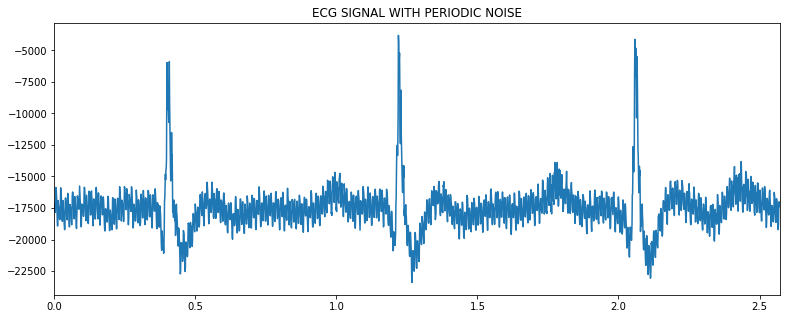

In [ ]:
data1 = data + sine
plt.figure()
plt.figure(figsize=(13, 5))
plt.plot(times,data1)
plt.margins(0, .05)
plt.title('ECG SIGNAL WITH PERIODIC NOISE')

##**Frequency Domain Analysis**
Frequency Domain. FFT len is half size of the signal length.
Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum 

(-5.0, 70.0)

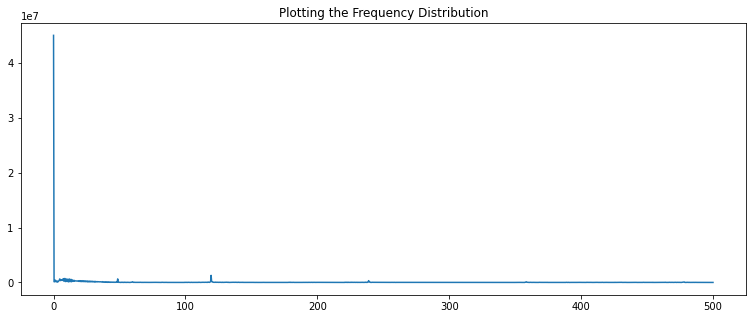

<Figure size 936x360 with 0 Axes>

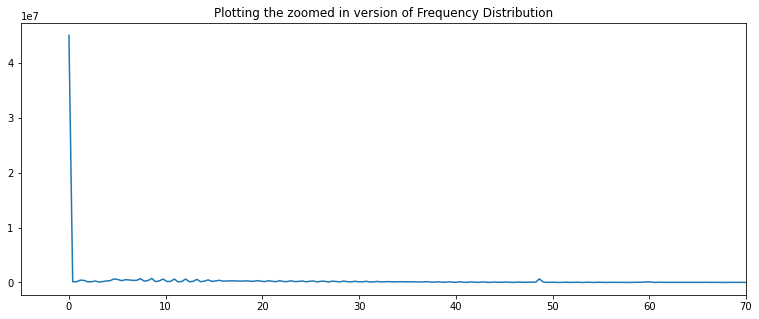

In [ ]:
fftData = np.abs( fft(data1) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,sampleRate/2, fftLen )
plt.figure(figsize=(13, 5))
plt.title("Plotting the Frequency Distribution")
plt.plot( freqs, fftData[0:fftLen] )


plt.figure()
plt.figure(figsize=(13, 5))
plt.title("Plotting the zoomed in version of Frequency Distribution")
plt.plot( freqs[0:250], fftData[0:250] )
plt.xlim(-5,70)


.

.

.

###**DESIGN OF BUTTERWORTH FILTER**
*The Butterworth filter is a type of signal processing filter designed to have a frequency response as flat as possible in the passband. It is also referred to as a maximally flat magnitude filter*

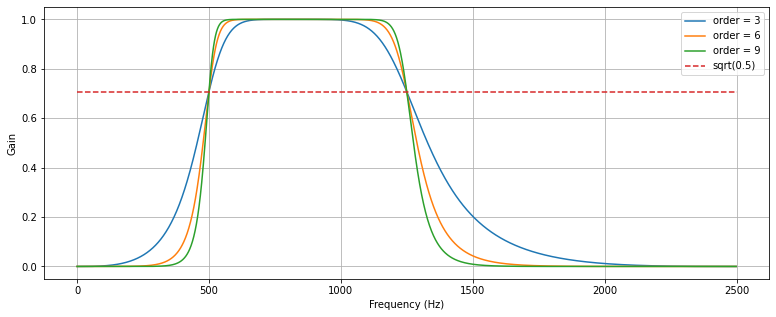

In [ ]:
from scipy.signal import butter, lfilter
 
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
 
 
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
 
 
def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
 
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0
 
    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
 
    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
 
    
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper right')
 
    plt.show()
 
 
run()

# **Applied a 3rd order lowpass filter at 0.1x Nyquist frequency**

<Figure size 936x360 with 0 Axes>

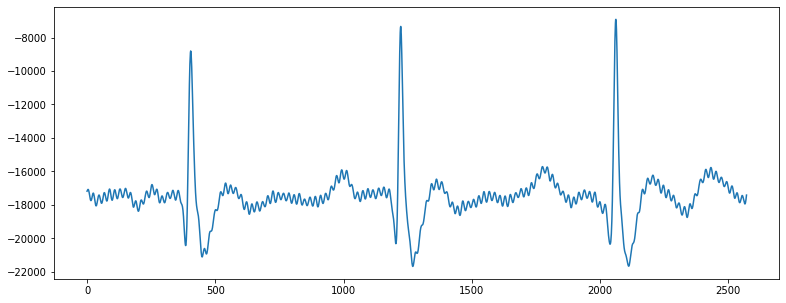

In [ ]:

b, a = scipy.signal.butter(3, 0.1)
filtered = scipy.signal.filtfilt(b, a, data1)
plt.figure()
plt.figure(figsize=(13, 5))
plt.plot(filtered)

## **Making the signal smooth,applying moving average filter**

Text(0.5, 1.0, 'filter using moving average filter')

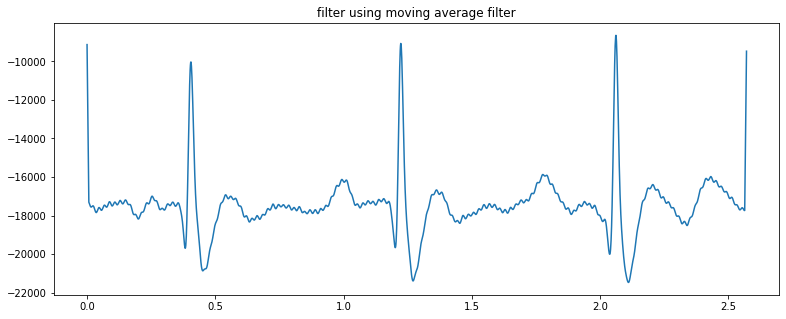

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w
matplotlib.rc('figure', figsize=(13, 5))
plt.plot(times,moving_average(filtered, 15))
plt.title('filter using moving average filter')